In [ ]:
!pip install ultralytics opencv-python-headless tqdm --upgrade
!pip install tensorflow
!pip install pillow

import os
os.makedirs('/content/intrusion_data', exist_ok=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import requests
from PIL import Image
from io import BytesIO

# OpenImages gun label (update label for latest dataset if needed)
gun_label = 'XKWUMkcNib71Ge6Yq1/0/g=='   # Example, change if required

# Download gun image IDs
df = pd.read_csv("https://storage.googleapis.com/cvdf-datasets/oid/open-images-dataset-train0.tsv", sep='\t', header=None, names=["ImageID", "Source", "LabelName"])
gun_images = df[df['LabelName'] == gun_label]['ImageID'].unique()

# Download first 30 images for demo
os.makedirs("/content/intrusion_data/gun_images", exist_ok=True)
for img_id in gun_images[:30]:
    img_url = f"https://storage.googleapis.com/openimages/v5/train/{img_id}.jpg"
    response = requests.get(img_url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        img.save(f"/content/intrusion_data/gun_images/{img_id}.jpg")

In [ ]:
df

,ImageID,Source,LabelName
0,TsvHttpData-1.0,NaN,NaN
1,https://c7.staticflickr.com/6/5499/10245691204...,141489.0,XKWUMkcNib71Ge6Yq1/0/g==
2,https://farm1.staticflickr.com/5615/1533586145...,7054258.0,CyvuYIfw90WAr8y0a1PaOw==
3,https://c7.staticflickr.com/8/7590/17048042861...,812483.0,cFlLPftwE0e7PznqGLwxKA==
4,https://farm5.staticflickr.com/5582/1823300949...,1282717.0,bIoO16vdUB8MpG+Wbe1bxw==
...,...,...,...
999996,https://farm4.staticflickr.com/7191/6889966103...,2855381.0,CZIa6j2Wi3ijgbmgC2fN0A==
999997,https://c5.staticflickr.com/6/5015/5523142962_...,652161.0,dMhHJW16tvadqXmQJUNt2Q==
999998,https://farm6.staticflickr.com/3554/3574480281...,4575874.0,mF4pt1xvkyrAx5qhTypBRg==
999999,https://c6.staticflickr.com/1/32/89331654_7844...,1714181.0,BYX5f4buKydRTjMMfIT8WA==


In [ ]:
# Download first 30 images for demo
os.makedirs("/content/intrusion_data/gun_images", exist_ok=True)
for img_id in gun_images[:30]:
    img_url = f"https://storage.googleapis.com/openimages/v5/train/XKWUMkcNib71Ge6Yq1/0/g==.jpg"
    response = requests.get(img_url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        img.save(f"/content/intrusion_data/gun_images/XKWUMkcNib71Ge6Yq1/0/g==.jpg")

In [ ]:
import os

os.makedirs('/content/intrusion_data/coco', exist_ok=True)
!wget -O /content/intrusion_data/coco/val2017.zip http://images.cocodataset.org/zips/val2017.zip
!unzip -q /content/intrusion_data/coco/val2017.zip -d /content/intrusion_data/coco/

!wget -O /content/intrusion_data/coco/annotations_trainval2017.zip http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip -q /content/intrusion_data/coco/annotations_trainval2017.zip -d /content/intrusion_data/coco/

--2025-08-21 06:03:02--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.233.9, 3.5.7.106, 3.5.28.176, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.233.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘/content/intrusion_data/coco/val2017.zip’

/content/intrusion_ 100%[===================>] 777.80M  17.3MB/s    in 47s     

2025-08-21 06:03:49 (16.5 MB/s) - ‘/content/intrusion_data/coco/val2017.zip’ saved [815585330/815585330]

--2025-08-21 06:03:56--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.202.105, 52.217.171.49, 52.217.120.65, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.202.105|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to

In [ ]:
from ultralytics import YOLO
import cv2
from tqdm import tqdm
from pathlib import Path

model = YOLO('yolov8n.pt')
img_dir = Path('/content/intrusion_data/coco/val2017')
crop_auth_dir = Path('/content/intrusion_data/authorized')
crop_intr_dir = Path('/content/intrusion_data/intruder')
crop_auth_dir.mkdir(exist_ok=True)
crop_intr_dir.mkdir(exist_ok=True)

# Randomly split crops into authorized/intruder for demo (replace with your IDs in real project)
img_paths = list(img_dir.glob('*.jpg'))
for img_path in tqdm(img_paths[:200]):
    img = cv2.imread(str(img_path))
    results = model(img, conf=0.25, verbose=False)[0]
    for i, box in enumerate(results.boxes):
        cls = int(box.cls.item())
        if cls != 0: continue  # Only person
        x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
        crop = img[max(0,y1):max(0,y2), max(0,x1):max(0,x2)]
        if crop.size == 0: continue
        # Save crop as per assignment (randomly for demo)
        out_dir = crop_auth_dir if (i % 2 == 0) else crop_intr_dir
        out_path = out_dir / f"{img_path.stem}_p{i}.jpg"
        cv2.imwrite(str(out_path), crop)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 200/200 [00:14<00:00, 13.87it/s]


In [ ]:
import glob
img_dir = "/content/intrusion_data/gun_images"
yolo_ann_dir = "/content/intrusion_data/gun_images/labels"
os.makedirs(yolo_ann_dir, exist_ok=True)

for img_path in glob.glob(f"{img_dir}/*.jpg"):
    img = Image.open(img_path)
    w, h = img.size
    # Full image as gun: class 0
    x_center, y_center = 0.5, 0.5
    width, height = 1.0, 1.0
    yolo_line = f"0 {x_center} {y_center} {width} {height}\n"
    ann_path = os.path.join(yolo_ann_dir, os.path.basename(img_path).replace('.jpg', '.txt'))
    with open(ann_path, 'w') as f:
        f.write(yolo_line)

Found 311 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.4904 - loss: 0.7604 - val_accuracy: 0.5455 - val_loss: 0.6853
Epoch 2/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.5731 - loss: 0.6864 - val_accuracy: 0.5455 - val_loss: 0.6854
Epoch 3/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.5621 - loss: 0.6734 - val_accuracy: 0.5455 - val_loss: 0.6829
Epoch 4/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.5354 - loss: 0.6896 - val_accuracy: 0.5455 - val_loss: 0.6865
Epoch 5/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.5602 - loss: 0.6794 - val_accuracy: 0.5455 - val_loss: 0.6965
Epoch 6/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.5566 - loss: 0.6714 - val_accuracy: 0.5455 - val_loss: 0.6928
Epoch 7/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.5356 - loss: 0.6870 - val_accuracy: 0.5455 - val_loss: 0.7007
Epoch 8/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5697 - loss: 0.6641 - val_accuracy: 0.5455 - val_loss:

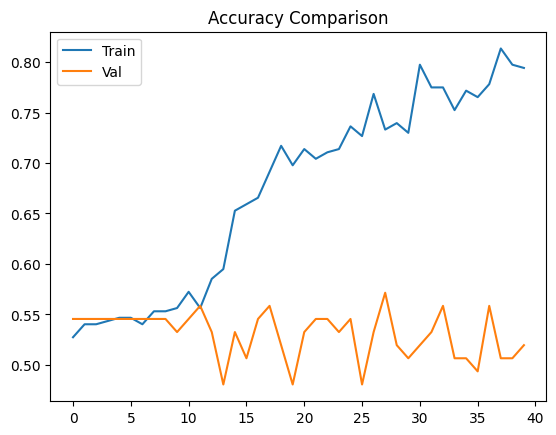

Train Acc: 0.794 - Val Acc: 0.519 - Diff: 27.47%


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Get min/max image sizes to set proper CNN input shape
import cv2, glob
auth_imgs = glob.glob('/content/intrusion_data/authorized/*.jpg')
intr_imgs = glob.glob('/content/intrusion_data/intruder/*.jpg')
all_imgs = auth_imgs + intr_imgs
sizes = [cv2.imread(img).shape[:2] for img in all_imgs]
max_h = max([s[0] for s in sizes])
max_w = max([s[1] for s in sizes])
IMG_SIZE = (max_h, max_w)  # Use max size, pad smaller images

def pad_img(img, target_shape):
    h, w = img.shape[:2]
    dh, dw = target_shape[0]-h, target_shape[1]-w
    top, bottom = dh//2, dh-(dh//2)
    left, right = dw//2, dw-(dw//2)
    return cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0,0,0])

# Prepare padded dataset
os.makedirs('/content/intrusion_data/authorized_padded', exist_ok=True)
os.makedirs('/content/intrusion_data/intruder_padded', exist_ok=True)
for img_list, folder in [(auth_imgs, '/content/intrusion_data/authorized_padded'), (intr_imgs, '/content/intrusion_data/intruder_padded')]:
    for img_path in img_list:
        img = cv2.imread(img_path)
        padded = pad_img(img, IMG_SIZE)
        cv2.imwrite(os.path.join(folder, os.path.basename(img_path)), padded)

# CNN Model (simple, can be customized)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                            rotation_range=10, zoom_range=0.1, horizontal_flip=True)

train_gen = datagen.flow_from_directory(
    '/content/intrusion_data/',
    classes=['authorized_padded', 'intruder_padded'],
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='binary',
    subset='training'
)
val_gen = datagen.flow_from_directory(
    '/content/intrusion_data/',
    classes=['authorized_padded', 'intruder_padded'],
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='binary',
    subset='validation'
)

model = models.Sequential([
    layers.Input(shape=(*IMG_SIZE, 3)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_gen, epochs=40, validation_data=val_gen)

# Accuracy Comparison
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend(); plt.title("Accuracy Comparison"); plt.show()

# Difference in accuracy
acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Train Acc: {acc:.3f} - Val Acc: {val_acc:.3f} - Diff: {abs(acc-val_acc)*100:.2f}%")

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_intruder(img_path, model, img_size):
    img = cv2.imread(img_path)
    padded = pad_img(img, img_size)
    padded = padded.astype('float32') / 255.
    padded = np.expand_dims(padded, axis=0)
    pred = model.predict(padded)[0][0]
    return 'Authorized' if pred < 0.5 else 'Intruder'

test_img = '/content/intrusion_data/authorized/000000010707_p0.jpg'  # Your test image path
result = predict_intruder(test_img, model, IMG_SIZE)
print("Prediction:", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: Authorized


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_intruder(img_path, model, img_size):
    img = cv2.imread(img_path)
    padded = pad_img(img, img_size)
    padded = padded.astype('float32') / 255.
    padded = np.expand_dims(padded, axis=0)
    pred = model.predict(padded)[0][0]
    return 'Authorized' if pred < 0.5 else 'Intruder'

test_img = '/content/intrusion_data/intruder/000000009378_p1.jpg'  # Your test image path
result = predict_intruder(test_img, model, IMG_SIZE)
print("Prediction:", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction: Intruder


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_intruder(img_path, model, img_size):
    img = cv2.imread(img_path)
    padded = pad_img(img, img_size)
    padded = padded.astype('float32') / 255.
    padded = np.expand_dims(padded, axis=0)
    pred = model.predict(padded)[0][0]
    return 'Authorized' if pred < 0.5 else 'Intruder'

test_img = '/content/intrusion_data/intruder/000000009378_p1.jpg'  # Your test image path
result = predict_intruder(test_img, model, IMG_SIZE)
print("Prediction:", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction: Intruder
